In [1]:
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
import os
from scipy.optimize import curve_fit
from decimal import Decimal

sns.set_style('white')

In [2]:
cwd = os.getcwd()
foldir = 'runtime'
datadir = os.path.join(cwd, foldir)

In [3]:
num_scat = 1
time_data = np.zeros(shape=(4, num_scat, 6))
count_numphotons = 0
for num_photons in np.logspace(2, 5, num=4):
    for scattering_degree in np.arange(0, num_scat):
        file = os.path.join(datadir, f'runtime-{num_photons}-{scattering_degree}.npy')
        time_data[count_numphotons, scattering_degree] = np.load(file)
        print(time_data[count_numphotons, scattering_degree])
    count_numphotons += 1

[0.001422 0.171007 0.158987 0.16171  0.161055 0.166569]
[0.001137 0.181962 0.184448 0.171809 0.18159  0.183575]
[0.001023 0.471687 0.509168 0.442237 0.432506 0.45782 ]
[1.340000e-03 3.054663e+00 3.819803e+00 3.806757e+00 3.855357e+00
 4.121478e+00]


In [4]:
ave_time = np.average(time_data[:, 0, 1:], axis=1)
std_time = np.std(time_data[:, 0, 1:], axis=1)
medium_init_time = time_data[:, 0, 0]

print(time_data.shape)

(4, 1, 6)


Text(0.5,1,'R = 0 \n (1 core, average of 10 trials)')

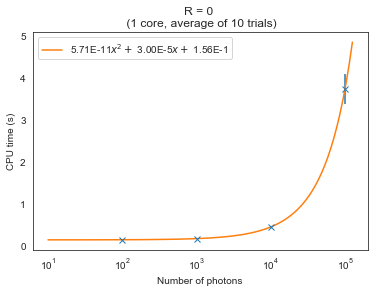

In [5]:
# pl.loglog(time_data[:, 0, 0], time_data[:, 0, 2], '.')
ax = pl.subplot()
ax.set_xscale("log", nonposx='clip')
# ax.set_yscale("log", nonposy='clip')
x = np.logspace(2,5,4)
xp = np.logspace(1,5.1,100)
y = ave_time
yerr = std_time

allshit = np.polyfit(x, y, 2, full=True)
fit = allshit[0]
fitfunc = np.poly1d(fit)

fit_consts = []
for i in range(len(fit)):
    fit_consts.append(f'{Decimal(fit[i]):.2E}')
fit_eq = fit_consts[0] + r'$x^2 +$ ' + fit_consts[1] + r'$x +$ ' + fit_consts[2]
pl.errorbar(x, y, yerr=yerr, fmt='x')
pl.plot(xp, fitfunc(xp), label=fit_eq)
pl.xlabel('Number of photons')
pl.ylabel('CPU time (s)')
pl.legend(loc='best')
pl.title('R = 0 \n (1 core, average of 10 trials)')

# convert to seconds

In [6]:
cwd = os.getcwd()
foldir = ''
# datadir = os.path.join(cwd, foldir)
num_scat = 5
time_data2 = np.zeros(shape=(num_scat, 6))
count_numphotons = 0
for scattering_degree in np.arange(0, num_scat):
    file = os.path.join(datadir, f'runtime-N{1E4}-{scattering_degree*2}.npy')
    print(np.load(file))
    time_data2[scattering_degree] = np.load(file)
count_numphotons += 1

[0.000943 0.434263 0.441742 0.411842 0.416108 0.405008]
[5.975049 2.150744 1.780663 1.829981 2.10938  2.148626]
[86.879883  2.860067  2.949404  2.856462  2.818969  2.854688]
[510.640542   4.155644   4.202457   4.283198   4.002184   4.031677]
[1659.950074    5.80602     7.516002    7.02847     6.167227    5.743207]


In [7]:
time_data2

array([[9.43000000e-04, 4.34263000e-01, 4.41742000e-01, 4.11842000e-01,
        4.16108000e-01, 4.05008000e-01],
       [5.97504900e+00, 2.15074400e+00, 1.78066300e+00, 1.82998100e+00,
        2.10938000e+00, 2.14862600e+00],
       [8.68798830e+01, 2.86006700e+00, 2.94940400e+00, 2.85646200e+00,
        2.81896900e+00, 2.85468800e+00],
       [5.10640542e+02, 4.15564400e+00, 4.20245700e+00, 4.28319800e+00,
        4.00218400e+00, 4.03167700e+00],
       [1.65995007e+03, 5.80602000e+00, 7.51600200e+00, 7.02847000e+00,
        6.16722700e+00, 5.74320700e+00]])

In [8]:
ave_time2 = np.average(time_data2[:, 1:], axis=1)
std_time2 = np.std(time_data2[:, 1:], axis=1)
medium_init_time = time_data2[:, 0]

Text(0.5,1,'4 cores, 10000 photons, average of 5 trials')

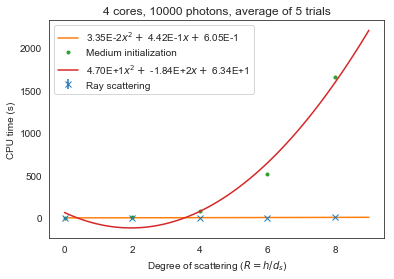

In [9]:
ax = pl.subplot()
# ax.set_xscale("log", nonposx='clip')
# ax.set_yscale("log", nonposy='clip')
x = np.arange(0, 9, 2)
xp = np.linspace(0, 9, 100)
y = ave_time2
yerr = std_time2

allshit1 = np.polyfit(x, y, 2, full=True)
fit1 = allshit1[0]
fitfunc1 = np.poly1d(fit1)

allshit2 = np.polyfit(x, medium_init_time, 2, full=True)
fit2 = allshit2[0]
fitfunc2 = np.poly1d(fit2)


fit_consts1 = []
for i in range(len(fit1)):
    fit_consts1.append(f'{Decimal(fit1[i]):.2E}')
fit_eq1 = fit_consts1[0] + r'$x^2 +$ ' + fit_consts1[1] + r'$x +$ ' + fit_consts1[2]

fit_consts2 = []
for i in range(len(fit2)):
    fit_consts2.append(f'{Decimal(fit2[i]):.2E}')
fit_eq2 = fit_consts2[0] + r'$x^2 +$ ' + fit_consts2[1] + r'$x +$ ' + fit_consts2[2]

pl.errorbar(x, y, yerr=yerr, fmt='x', label='Ray scattering')
pl.plot(xp, fitfunc1(xp), label=fit_eq1)
pl.plot(x, medium_init_time, '.', label='Medium initialization')
pl.plot(xp, fitfunc2(xp), label=fit_eq2)
pl.xlabel(r'Degree of scattering ($R = h/d_s$)')
pl.ylabel('CPU time (s)')
pl.legend(loc='best')
pl.title('4 cores, 10000 photons, average of 5 trials')
## do for higher degrees of scattering

